# Pandas and Seaborn!

_Pandas_ is a very strong library for manipulating large and complex datasets using a new data structure, the **data frame**, which models a table of data.
Pandas helps to close the gap between Python and R for data analysis and statistical computing.

Pandas data frames address three deficiencies of NumPy arrays:

- data frame hold heterogenous data; each column can have its own numpy.dtype,
- the axes of a data frame are labeled with column names and row indices,
- and, they account for missing values which this is not directly supported by arrays.

Data frames are extremely useful for data manipulation.
They provide a large range of operations such as filter, join, and group-by aggregation, as well as plotting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print('Pandas version:', pd.__version__)

Pandas version: 2.1.4


# Data Analysis of Life History Traits

We will analyze animal life-history data from [AnAge](http://genomics.senescence.info/download.html#anage). 

In [2]:
data = pd.read_csv('../data/anage_data.txt', sep='\t') # lots of other pd.read_... functions
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(4219, 31)


Pandas holds data in `DataFrame` (similar to _R_).
`DataFrame` have a single row per observation (in contrast to the previous exercise in which each table cell was one observation), and each column has a single variable. Variables can be numbers or strings.

The `head` method gives us the 5 first rows of the data frame.

In [3]:
data.head()

,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),...,Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
0,3,Animalia,Arthropoda,Branchiopoda,Diplostraca,Daphniidae,Daphnia,pulicaria,Daphnia,NaN,...,NaN,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"1294,1295,1296"
1,5,Animalia,Arthropoda,Insecta,Diptera,Drosophilidae,Drosophila,melanogaster,Fruit fly,7.0,...,NaN,captivity,large,acceptable,0.05,0.04,NaN,NaN,NaN,"2,20,32,47,53,68,69,240,241,242,243,274,602,98..."
2,6,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Apis,mellifera,Honey bee,NaN,...,812,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"63,407,408,741,805,806,808,812,815,828,830,831..."
3,8,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Cardiocondyla,obscurior,Cardiocondyla obscurior,NaN,...,1293,captivity,medium,acceptable,NaN,NaN,NaN,NaN,NaN,1293
4,9,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Lasius,niger,Black garden ant,NaN,...,411,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"411,813,814"


In a pandas DataFrame, each column can have a different dtype, allowing flexibility in representing various types of data such as integers, floating-point numbers, strings, or boolean values. This distinction ensures that data is appropriately interpreted and manipulated during analysis, enabling efficient and accurate data processing in pandas.
The `dtypes` method returns a Series containing the data types of each column in the DataFrame df. The index of the Series represents the column names, and the values represent the data types of the corresponding columns.

In [4]:
data.dtypes

HAGRID                                int64
Kingdom                              object
Phylum                               object
Class                                object
Order                                object
Family                               object
Genus                                object
Species                              object
Common name                          object
Female maturity (days)              float64
Male maturity (days)                float64
Gestation/Incubation (days)         float64
Weaning (days)                      float64
Litter/Clutch size                  float64
Litters/Clutches per year           float64
Inter-litter/Interbirth interval    float64
Birth weight (g)                    float64
Weaning weight (g)                  float64
Adult weight (g)                    float64
Growth rate (1/days)                float64
Maximum longevity (yrs)             float64
Source                               object
Specimen origin                 

#### Identifying missing values

To identify missing values, we can use the `isnull()` method, which returns a DataFrame of the same shape as data but with boolean values (True for NaN values and False otherwise). Appling `.sum()` on the resulting dataframe will give us the number of missing values per column.

In [5]:
# Identify missing values
missing_values = data.isnull().sum()
print(missing_values)


HAGRID                                 0
Kingdom                                0
Phylum                                 0
Class                                  0
Order                                  0
Family                                 0
Genus                                  0
Species                                0
Common name                            0
Female maturity (days)              2142
Male maturity (days)                2515
Gestation/Incubation (days)         2515
Weaning (days)                      3409
Litter/Clutch size                  2140
Litters/Clutches per year           2927
Inter-litter/Interbirth interval    3456
Birth weight (g)                    2995
Weaning weight (g)                  3814
Adult weight (g)                    1268
Growth rate (1/days)                3660
Maximum longevity (yrs)              442
Source                               514
Specimen origin                        0
Sample size                            0
Data quality    

To remove rows with missing data, you can use the dropna() method. By default, dropna() removes all rows containing any missing values.

In [6]:
# Remove rows with any missing values
data_clean = data.dropna()

# Remove rows with missing values only in specific columns
data_clean_specific = data.dropna(subset=['Female maturity (days)', 'Male maturity (days)'])

# Remove rows where all values are missing
data_clean_all = data.dropna(how='all')

# Remove rows with a threshold number of non-missing values
data_clean_thresh = data.dropna(thresh=2)  # Keeps rows with at least 2 non-missing values

To remove columns with missing data, you can use the dropna() method along with specifying the axis parameter as 1 or 'columns'.

#### Grouping and aggregation

Grouping in pandas involves splitting the data into groups based on some criteria. This can be a categorical variable or a function that returns group labels. The groupby() function is used to perform grouping in pandas.
For example, in the AnAge dataset, you might want to group animals by their class (e.g., mammals, birds) to analyze characteristics specific to each class.

In [7]:
grouped_data = data.groupby('Class')
grouped_data

Once the data is grouped, you can apply aggregation functions to each group to compute summary statistics. Aggregation functions include mean, median, sum, min, max, count, etc. The agg() function is commonly used for aggregation in pandas.

In [8]:
summary_stats = grouped_data.agg(mean_adult_weight = ('Adult weight (g)', 'mean'), max_longevity = ('Maximum longevity (yrs)','max'))
summary_stats

,mean_adult_weight,max_longevity
Class,,
Amphibia,49.011586,102.00
Aves,979.649646,83.00
Bivalvia,NaN,507.00
Branchiopoda,NaN,0.19
Cephalaspidomorphi,461.450000,10.00
Chondrichthyes,489921.219298,392.00
Chondrostei,223891.367308,152.00
Chromadorea,NaN,0.16
Cladistei,NaN,34.00


Let's sort the DataFrame summary_stats by the mean_body_mass in descending order:

In [9]:
summary_stats.sort_values(by='mean_adult_weight', ascending=False)

,mean_adult_weight,max_longevity
Class,,
Chondrichthyes,489921.219298,392.00
Mammalia,461839.404065,211.00
Chondrostei,223891.367308,152.00
Coelacanthi,52250.000000,48.00
Reptilia,38341.622727,177.00
Teleostei,14948.511552,205.00
Holostei,5443.625000,36.00
Aves,979.649646,83.00
Cephalaspidomorphi,461.450000,10.00


#### Extract more intresting statistics of your choice using aggregation:

In [10]:
#Your code here

`DataFrame` has many of the features of `numpy.ndarray` - it also has a `shape` and various statistical methods (`max`, `mean` etc.).
However, `DataFrame` allows richer indexing.
For example, let's browse our data for species that have body mass greater than 300 kg.
First we will a create new column (`Series` object) that tells us if a row is a large animal row or not:

In [11]:
large_index = data['Body mass (g)'] > 300 * 1000 # 300 kg
large_index.head()

0    False
1    False
2    False
3    False
4    False
Name: Body mass (g), dtype: bool

Boolean indexing is a powerful technique in pandas for filtering a DataFrame based on a condition specified as a boolean expression. It allows you to select rows that satisfy certain criteria, enabling efficient data manipulation and analysis.

Now, we slice (filter) our data with this boolean index to select only the rows correponsidng to large index. 
The `iterrows` method let's us iterate over the rows of the data.
For each row we get both the row as a `Series` object (similar to `dict` for our use) and the row number as an `int` (this is similar to the use of `enumerate` on lists and strings).

In [12]:
large_data = data[large_index]
for i, row in large_data.iterrows(): 
    print(row['Common name'], row['Body mass (g)']/1000, 'kg')

Domestic cattle 347.0 kg
Dromedary 407.0 kg
Moose 325.0 kg
Asiatic elephant 3672.0 kg
West Indian manatee 450.0 kg


So... a [Dromedary](http://en.wikipedia.org/wiki/Dromedary) is the single-humped camel.

![Camel](https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/07._Camel_Profile%2C_near_Silverton%2C_NSW%2C_07.07.2007.jpg/330px-07._Camel_Profile%2C_near_Silverton%2C_NSW%2C_07.07.2007.jpg)

Let's continue with small and medium animals - we filter out anything that doesn't have body mass of less than 300 kg.

In [13]:
data = data[data['Body mass (g)'] <  300 * 1000] 

For starters, let's plot a scatter of body mass vs. metabolic rate.
Because we work with pandas, we can do that with the `plot` method of `DataFrame`, specifying the columns for `x` and `y` and a plotting style (without the style we would get a line plot which makes no sense here).

You can change `%matplotlib inline` to `%matplotlib widget` to get interactive plotting -- if this causes errors, just stay with `inline`, as the `widget` feature is new and may require to update some packages.

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

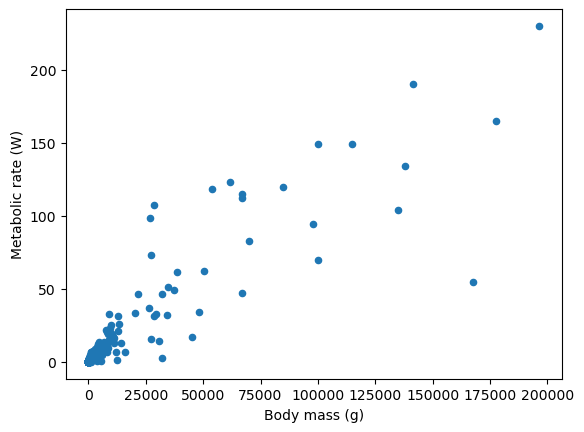

In [15]:
data.plot.scatter(x='Body mass (g)', y='Metabolic rate (W)', legend=False)
plt.ylabel('Metabolic rate (W)');

If this plot looks funny, you are probably using Pandas with version <0.22; the bug was [reported](https://github.com/pandas-dev/pandas/issues/11471) and fixed in version 0.22.

From this plot it seems that 
1. there is a correlation between body mass and metabolic rate, and 
1. there are many small animals (less than 30 kg) and not many medium animals (between 50 and 300 kg).

Before we continue, I prefer to have mass in kg, let's add a new column:

In [16]:
data['Body mass (kg)'] = data['Body mass (g)'] / 1000

/var/folders/q8/rdgxsl4523v9jc40pjjzp9g40000gp/T/ipykernel_8523/3233483782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Body mass (kg)'] = data['Body mass (g)'] / 1000


Next, let's check how many records do we have for each Class (as in the taxonomic unit): 

In [17]:
class_counts = data['Class'].value_counts()
print(class_counts)

Class
Mammalia    417
Aves        171
Amphibia     18
Reptilia     16
Name: count, dtype: int64


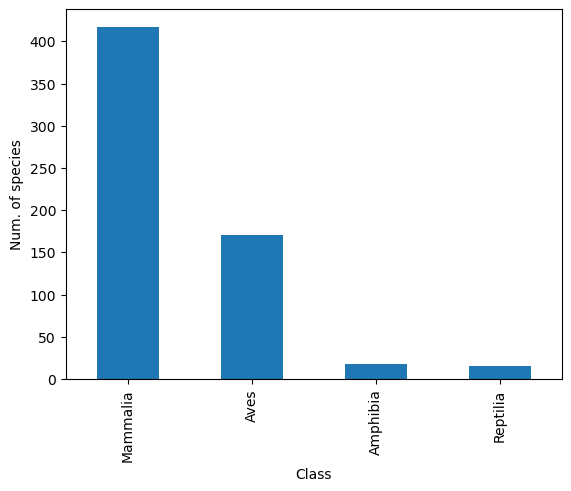

In [18]:
# plt.figure() # only required if you used %matplotlib widget
class_counts.plot.bar()
plt.ylabel('Num. of species');

So we have lots of mammals and birds, and a few reptiles and amphibians. This is important as amphibian and reptiles could have a different replationship between mass and metabolism because they are cold blooded.

## Exercise: data frames

1) **Print the number** of reptiles are in this dataset, and how many of them are of the genus `Python`.

**Reminder**
- Edit cell by double clicking
- Run cell by pressing _Shift+Enter_
- Get autocompletion by pressing _Tab_
- Get documentation by pressing _Shift+Tab_

In [19]:
#Your code here

In [20]:
print("# of reptiles: ", reptiles)
print("# of pythons: ", pythons)

NameError: name 'reptiles' is not defined

2) **Plot the histogram of the mammal body masses** using `plot.hist()`.
Since most mammals are small, the histogram looks better if we plot a cumulative distribution rather then the distribution - we can do this with the `cumulative` argument. You also need to specify a higher `bins` argument then the default.

In [ ]:
#Your code here

# Seaborn

Let's do a simple linear regression plot; but let's do it in separate for each Class. We can do this kind of thing with Matplotlib and [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html), but a very good tool for statistical visualizations is **[Seaborn](http://seaborn.pydata.org)**.

Seaborn adds on top of Pandas a set of sophisticated statistical visualizations, similar to [ggplot2](http://ggplot2.org) for R.

In [21]:
import seaborn as sns
sns.set_context("talk")

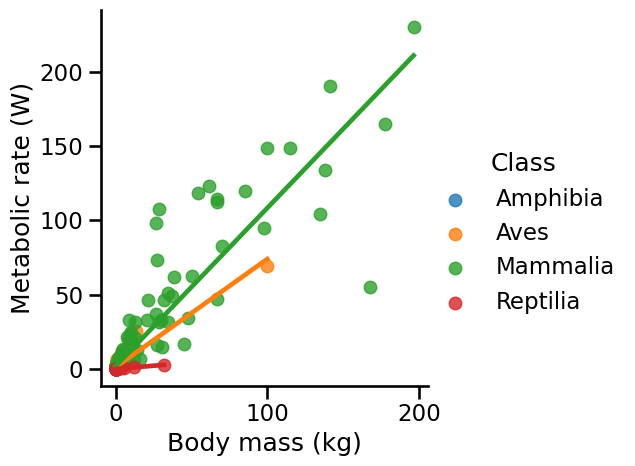

In [22]:
sns.lmplot(
    x='Body mass (kg)', 
    y='Metabolic rate (W)', 
    hue='Class', 
    data=data, 
    ci=False, 
);

- `hue` means _color_, but it also causes _seaborn_ to fit a different linear model to each of the Classes. 
- `ci` controls the confidence intervals. I chose `False`, but setting it to `True` will show them.

We can see that mammals and birds have a clear correlation between size and metabolism and that it extends over a nice range of mass, so let's stick to mammals; next up we will see which orders of mammals we have.

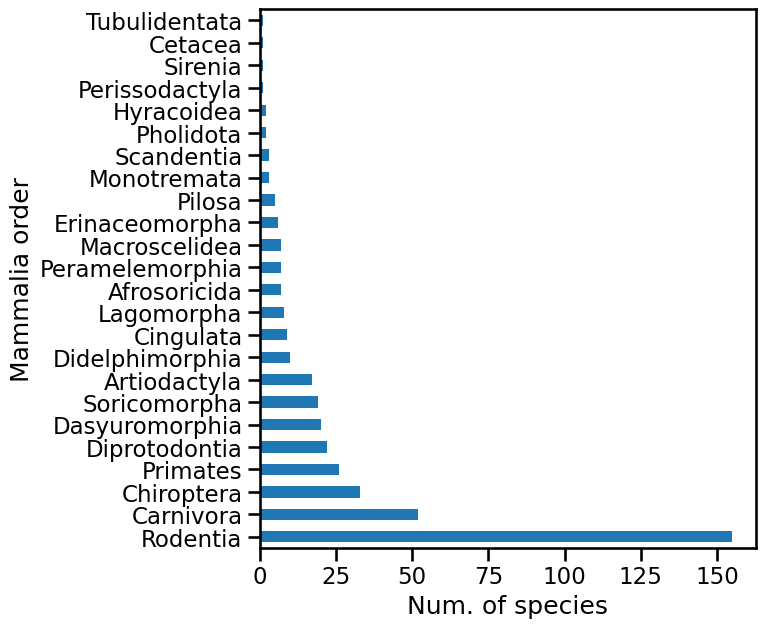

In [26]:
mammalia = data[data.Class=='Mammalia']
order_counts = mammalia.Order.value_counts()
ax = order_counts.plot.barh()
ax.set(
    xlabel='Num. of species',
    ylabel='Mammalia order'
)
ax.figure.set_figheight(7)

You see we have alot of rodents and carnivores, but also a good number of bats (_Chiroptera_) and primates.

Let's continue with orders that have at least 20 species - this also includes some cool marsupials like Kangaroo, Koala and [Taz](http://upload.wikimedia.org/wikipedia/en/c/c4/Taz-Looney_Tunes.svg) (Diprotodontia and Dasyuromorphia)

In [27]:
orders = order_counts[order_counts >= 20]
print(orders)
abund_mammalia = mammalia[mammalia.Order.isin(orders.index)]

Order
Rodentia          155
Carnivora          52
Chiroptera         33
Primates           26
Diprotodontia      22
Dasyuromorphia     20
Name: count, dtype: int64


In [ ]:
sns.lmplot(
    x='Body mass (kg)', 
    y='Metabolic rate (W)', 
    hue='Order',
    data=abund_mammalia, 
    ci=False, 
    height=8,
    aspect=1.3,
    line_kws={'lw':2, 'ls':'--'}, 
    scatter_kws={'s':50, 'alpha':0.5}
);
# if you get an error about height not being a keyword, change it to size or update seaborn: conda update seaborn

Because there is alot of data here I made the lines thinner - this can be done by giving _matplotlib_ keywords as a dictionary to the argument `line_kws` - and I made the markers bigger but with alpha (transperancy) 0.5 using the `scatter_kws` argument.

Still ,there's too much data, and part of the problem is that some orders are large (e.g. primates) and some are small (e.g. rodents).

Let's plot a separate regression plot for each order.
We do this using the `col` and `row` arguments of `lmplot`, but in general this can be done for any plot using [seaborn's `FacetGrid` function](http://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html).

In [ ]:
sns.lmplot(
    x='Body mass (kg)', 
    y='Metabolic rate (W)', 
    data=abund_mammalia, 
    hue='Order',
    col='Order', 
    col_wrap=3, 
    ci=None, 
    scatter_kws={'s':40}, 
    sharex=False, 
    sharey=False
);

We used the `sharex=False` and `sharey=False` arguments so that each Order will have a different axis range and so the data is will spread nicely.

# Statistics

Lastly, let's do some quick statistics.

First, calculate a summary of the the mammals using `describe`.

In [ ]:
mass = abund_mammalia
mass.describe()

Now lets check if we can significantly say that the body mass of rodents is lower than that of carnivores.

## Exercise: boxplot
**Plot boxplots of the mammals body mass** using Seaborn, which is easier to use (and also makes nicer boxplots) then standard matplotlib boxplot.

In [ ]:
#Your code here

Now, we'll use a t-test (implemented in the `scipy.stats` module) to test the hypothesis that there is *no difference* in body mass between rodents and carnivores.

- `ttest_ind` calculates the t-test for the means of *two independent* samples of scores.
- `scipy.stats` has many more statistical tests, distributions, etc.

In [28]:
from scipy.stats import ttest_ind

In [29]:
carnivora_mass = abund_mammalia.loc[abund_mammalia['Order']=='Carnivora', 'Body mass (kg)']
rodentia_mass = abund_mammalia.loc[abund_mammalia['Order']=='Rodentia', 'Body mass (kg)']

res = ttest_ind(carnivora_mass, rodentia_mass, equal_var=False)
print("P-value of t-test: {:.2g}".format(res.pvalue))

P-value of t-test: 0.00033


# References

- Examples: [Seaborn example gallery](http://seaborn.pydata.org/examples/index.html)
- Slides: [Statistical inference with Python](https://docs.google.com/presentation/d/1imQAEmNg4GB3bCAblauMOOLlAC95-XvkTSKB1_dB3Tg/pub?slide=id.p) by Allen Downey
- Book: [Think Stats](greenteapress.com/thinkstats2/html/index.html) by Allen Downey - statistics with Python. Free Ebook.
- Blog post: [A modern guide to getting started with Data Science and Python](http://twiecki.github.io/blog/2014/11/18/python-for-data-science/)
- Tutorial: [An Introduction to Pandas](http://www.synesthesiam.com/posts/an-introduction-to-pandas.html)

# Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com).

The notebook was written using [Python](http://python.org/) 3.7.
Dependencies listed in [environment.yml](../environment.yml).

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)